In [1]:
%run twisted_graphene.py

In [2]:
import numpy as np

In [ ]:
np.set_printoptions()

A ideia desse notebook é compilar uma série de testes sobre o código `twisted_graphene.py`, completa o suficiente para me deixar confiante de que o código funciona e fornece resultados corretos para o que precisamos.

# Rede cristalina

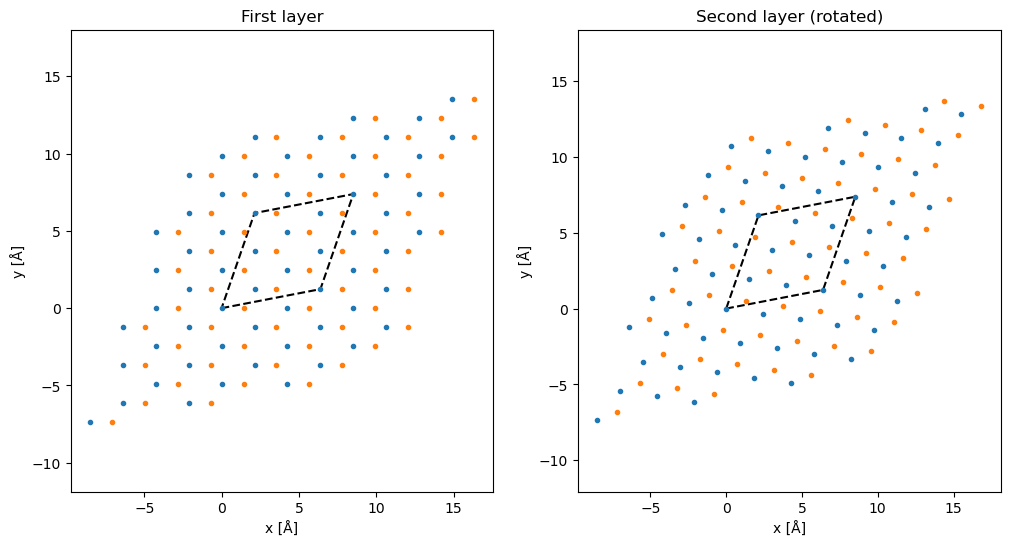

In [2]:
p,q=1,1
r,L1,L2=superlattice(p,q)
N=number_of_sublattice_positions(p,q)
vertices=np.array([[0,0,0],L1,L1+L2,L2,[0,0,0]])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('First layer')
plt.plot(vertices[:,0],vertices[:,1],'k--')
for m in range(-1,2):
    for n in range(-1,2):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[0:N,0],rr[0:N,1],'.',color='tab:blue')
        plt.plot(rr[N:2*N,0],rr[N:2*N,1],'.',color='tab:orange')
plt.axis('equal')
plt.xlabel('x [Å]')
plt.ylabel('y [Å]')
plt.subplot(122)
plt.title('Second layer (rotated)')
plt.plot(vertices[:,0],vertices[:,1],'k--')
for m in range(-1,2):
    for n in range(-1,2):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[2*N:3*N,0],rr[2*N:3*N,1],'.',color='tab:blue')
        plt.plot(rr[3*N::,0],rr[3*N::,1],'.',color='tab:orange')
plt.axis('equal')
plt.xlabel('x [Å]')
plt.ylabel('y [Å]')
plt.show()

# Hoppings

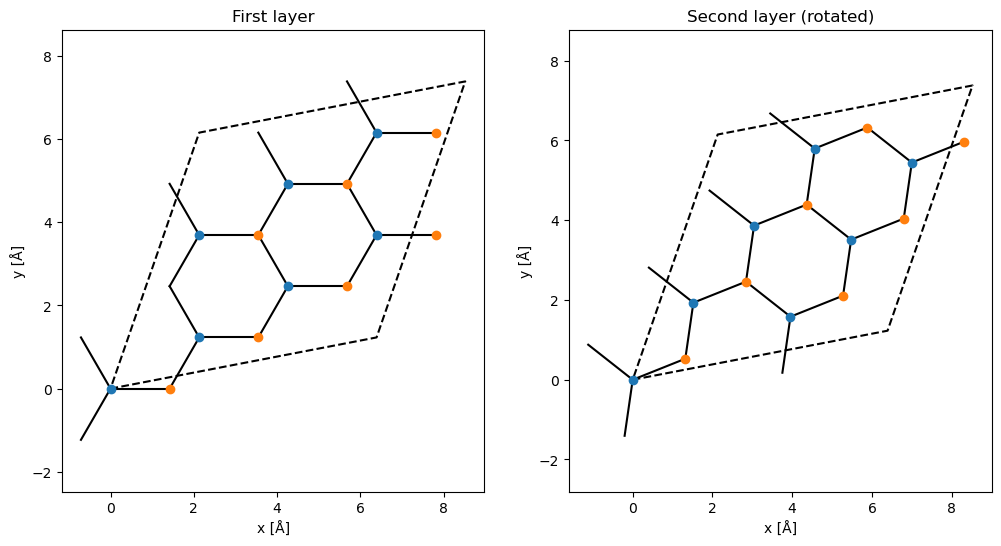

In [3]:
p,q=1,1
r,L1,L2=superlattice(p,q)
N=number_of_sublattice_positions(p,q)
vertices=np.array([[0,0,0],L1,L1+L2,L2,[0,0,0]])
hops=hoppings(r,L1,L2,400*N,1.421)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('First layer')
plt.plot(vertices[:,0],vertices[:,1],'k--')
mask=(hops[:,0]<2*N)*(hops[:,1]<2*N)
for r1,r2 in zip(hops[mask,2:4],hops[mask,5:7]):
    plt.plot([r1[0],r2[0]],[r1[1],r2[1]],'k-')
for m in range(0,1):
    for n in range(0,1):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[0:N,0],rr[0:N,1],'o',color='tab:blue')
        plt.plot(rr[N:2*N,0],rr[N:2*N,1],'o',color='tab:orange')
plt.axis('equal')
plt.xlabel('x [Å]')
plt.ylabel('y [Å]')
plt.subplot(122)
plt.title('Second layer (rotated)')
plt.plot(vertices[:,0],vertices[:,1],'k--')
mask=(hops[:,0]>=2*N)*(hops[:,1]>=2*N)
for r1,r2 in zip(hops[mask,2:4],hops[mask,5:7]):
    plt.plot([r1[0],r2[0]],[r1[1],r2[1]],'k-')
for m in range(0,1):
    for n in range(0,1):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[2*N:3*N,0],rr[2*N:3*N,1],'o',color='tab:blue')
        plt.plot(rr[3*N::,0],rr[3*N::,1],'o',color='tab:orange')
plt.axis('equal')
plt.xlabel('x [Å]')
plt.ylabel('y [Å]')
plt.show()

# Parâmetros de hopping

In [4]:
Nr=100
radius=np.linspace(0,8,Nr)
VAA=np.zeros((Nr,Nr))
VAB=np.zeros((Nr,Nr))
VBA=np.zeros((Nr,Nr))
VBB=np.zeros((Nr,Nr))
for i in range(Nr):
    x=np.linspace(0,radius[i],Nr)
    for j in range(Nr):
        y=np.sqrt(radius[i]**2-x[j]**2)
        VAA[i,j]=t_inter(0.,0.,x[j],y,1,1,0.0)
        VAB[i,j]=t_inter(0.,0.,x[j],y,1,-1,0.0)
        VBA[i,j]=t_inter(0.,0.,x[j],y,-1,1,0.0)
        VBB[i,j]=t_inter(0.,0.,x[j],y,-1,-1,0.0)

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in double_scalars
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in double_scalars
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


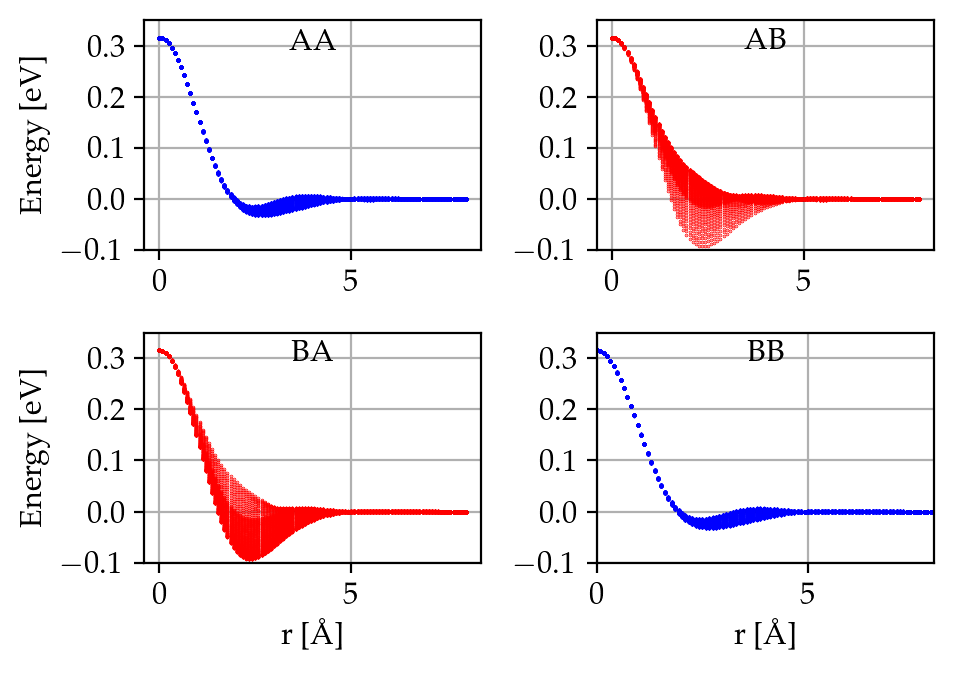

In [7]:
# plt.figure(figsize=(10,8))

ax1=plt.subplot(221)
plt.title('AA',loc="center",y=0.8)
plt.plot(radius,VAA,'b.',ms=.5)
plt.ylim((-0.1,0.35))
plt.yticks([-0.1,0.,0.1,0.2,0.3])
plt.grid(True)
plt.ylabel('Energy [eV]')

ax2=plt.subplot(222)
plt.title('AB',loc="center",y=0.8)
plt.plot(radius,VAB,'r.',ms=.5)
plt.ylim((-0.1,0.35))
plt.yticks([-0.1,0.,0.1,0.2,0.3])
plt.grid(True)

ax3=plt.subplot(223)
plt.title('BA',loc="center",y=0.8)
plt.plot(radius,VBA,'r.',ms=.5)
plt.ylim((-0.1,0.35))
plt.yticks([-0.1,0.,0.1,0.2,0.3])
plt.grid(True)
plt.xlabel('r [Å]')
plt.ylabel('Energy [eV]')

ax4=plt.subplot(224)
plt.title('BB',loc="center",y=0.8)
plt.plot(radius,VBB,'b.',ms=.5)
plt.ylim((-0.1,0.35))
plt.yticks([-0.1,0.,0.1,0.2,0.3])
plt.grid(True)
plt.xlabel('r [Å]')

# plt.tight_layout()
# plt.savefig('img/interlayer_hoppings.png')
# plt.savefig('img/interlayer_hoppings.pdf')
plt.savefig('interlayer_hoppings.png',dpi=300)
plt.xlim((0.0,8.0))
plt.show()

# Bandas

|     Nome     | $\theta$ | p | q |   |
|:------------:|:--------:|:-:|:-:|:-:|
|      AA      |    0°    | 1 | 0 |   |
| AB ou Bernal |    60°   | 0 | 1 |   |

In [3]:
g=TwistedBilayerGraphene(0,1)

In [10]:
g.calc_hops(8.0)

In [11]:
g.set_hamiltonian(interlayer=1.0,V=0.0)

print(np.real(g.H(g.Gamma).todense()))

[[ 1.644      -9.4845      0.18033565  0.11301518]
 [-9.4845      1.644       0.11301518  0.14279793]
 [ 0.18033565  0.11301518  1.644      -9.4845    ]
 [ 0.11301518  0.14279793 -9.4845      1.644     ]]


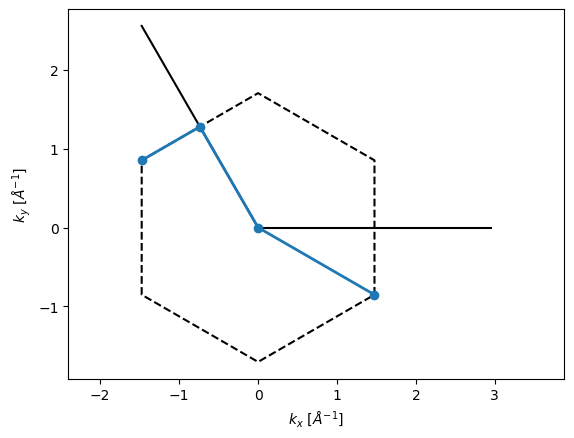

In [12]:
_kpoints=g.path_KGMKp
g.set_kpath(_kpoints,[100,100,100])
_kpoints=np.array(_kpoints)

vertices=np.array([g.K[0],g.Kp[0],g.K[1],g.Kp[1],g.K[2],g.Kp[2],g.K[0]])
plt.plot([0,g.G1[0]],[0,g.G1[1]],'k-')
plt.plot([0,g.G2[0]],[0,g.G2[1]],'k-')
plt.plot(vertices[:,0],vertices[:,1],'k--')
plt.plot(_kpoints[:,0],_kpoints[:,1],'o-',lw=2)
plt.axis('equal')
plt.xlabel(r'$k_x$ [$Å^{-1}$]')
plt.ylabel(r'$k_y$ [$Å^{-1}$]')
plt.show()

In [13]:
g.calc_bands(nbands=4,Ef=0.0)

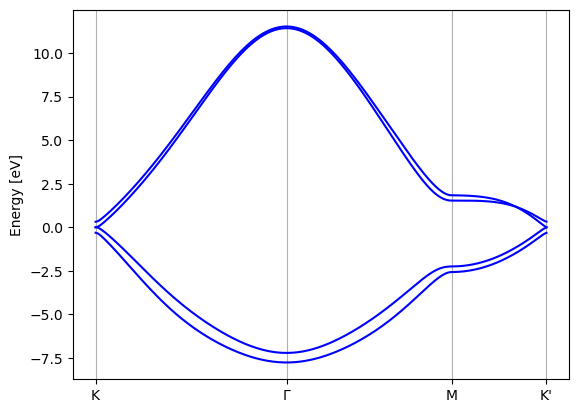

In [15]:
plt.plot(g.ell,g.bands+0.3504,'b')
plt.xticks(g.ell[g.kticks],['K','$\Gamma$','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.show()